In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
jitz = pd.read_csv(r"C:\Users\tanne\Programming\DataSets\All Submission Only Data - Master Submission Only Data Adult.csv")

<div class="alert alert-success">
    <h2>Overview</h2>
    <p>Description: Submission only jiu jitsu data set with over 6000 entries from a variety of tournaments. Time frame of data ranges from late 2000's to 2018.</p>
    <h2>Relevant Columns</h2>
    <ul>
        <li>Total Seconds: Total Match Time</li>
        <li>Gi/No Gi: States whether match was in the gi or no gi</li>
        <li>Belt/Skill: Gi- White, Blue, Purple, Brown, Black   No Gi- Novice, Intermediate, Advanced</li>
        <li>Division: Men, Women, Masters and Juvenile</li>
        <li>Submission: Submission that one that match</li>
    </ul>
</div>

In [3]:
jitz.head(10)

,Hours,Minutes,Seconds,Total Seconds,Gi/No Gi,Belt/Skill,Division,submission,Unnamed: 8
0,NaN,NaN,5.0,5.0,Gi,Blue,Men,Straight ankle,Master Average: 506 seconds
1,NaN,NaN,7.0,7.0,No Gi,Advanced,Men,brabo,NaN
2,NaN,NaN,8.0,8.0,gi,white,30+ Men,Armbar,Data through Sub Only Richmond December 2018
3,NaN,NaN,9.0,9.0,Gi,Brown,Men,Darce,Missing Philly 2018 Sub Only
4,NaN,NaN,9.0,9.0,Gi,Blue,Men,Straight ankle,NaN
5,NaN,NaN,9.0,9.0,No Gi,Intermediate,Men,Kimura,NaN
6,NaN,NaN,10.0,10.0,No Gi,Advanced,Women,triangle,NaN
7,NaN,NaN,11.0,11.0,No Gi,Advanced,Men,Heel hook,NaN
8,NaN,NaN,11.0,11.0,no gi,intermediate,men,guillotine,NaN
9,NaN,NaN,11.0,11.0,no gi,intermediate,men,Triangle,NaN


In [4]:
jitz.describe()

,Hours,Minutes,Seconds,Total Seconds
count,41.000000,5727.000000,5950.000000,6158.000000
mean,1.048780,8.164135,29.737983,506.337610
std,0.312348,9.010857,17.467712,635.902839
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,15.000000,143.000000
50%,1.000000,5.000000,30.000000,308.000000
75%,1.000000,10.000000,44.000000,624.000000
max,2.000000,112.000000,333.000000,8830.000000


In [5]:
#checking if data types are correct for analysis
jitz.dtypes

Hours            float64
Minutes          float64
Seconds          float64
Total Seconds    float64
Gi/No Gi          object
Belt/Skill        object
Division          object
submission        object
Unnamed: 8        object
dtype: object

### Initial Thoughts
<p>Looking at the first 10 columns and at df.describe, it looks like there are a few columns we can get rid of and some max values in the time categories that need to be investigated. Jiu jitsu matches usually do not last very long and two hours sounds suspicous so I will look at those rows just to make sure.</p>

In [6]:
#confirming the max value in hour column
print(jitz['Hours'].max())
#printing out the rows with Hours equal 2.0
jitz[jitz['Hours']==2.0]

2.0


,Hours,Minutes,Seconds,Total Seconds,Gi/No Gi,Belt/Skill,Division,submission,Unnamed: 8
5018,2.0,11.0,NaN,1380.0,No Gi,Intermediate,Men,Triangle,NaN
5399,2.0,27.0,10.0,8830.0,no gi,novice,men,omoplata,NaN
5676,2.0,12.0,50.0,7970.0,Gi,Blue,30+,collar choke,NaN


<p>The rows with 2 hours looks fine, they just seem to be outliers.</p>

<div class="alert alert-success">
    <h1> Data Cleaning and Table Reformating</h1>
</div>

### Removing Columns

In [7]:
#dropping Unamed: 8 Column
jitz.drop(columns=['Unnamed: 8'], inplace=True)

In [8]:
#Finding avg match time to determine if the other time columns are necessary
avgMatchTime = jitz['Total Seconds'].mean()
print("Average match time: " + str(round(avgMatchTime, 2)))

Average match time: 506.34


In [9]:
#Since avg match time is 506 seconds, the use for the hours minutes and seconds columns is not needed
jitz.drop(columns=['Hours', 'Minutes', 'Seconds'], inplace=True)

### Changing Column Names

In [10]:
#renaming all columns to use lowercase and snakecase, submission column name does not need to be altered
jitz.rename(columns={"Total Seconds": "total_seconds", 
                     "Gi/No Gi": "gi/no_gi", 
                     "Belt/Skill": "belt/skill", 
                     "Division": "division"}, inplace=True)

In [11]:
jitz.head()

,total_seconds,gi/no_gi,belt/skill,division,submission
0,5.0,Gi,Blue,Men,Straight ankle
1,7.0,No Gi,Advanced,Men,brabo
2,8.0,gi,white,30+ Men,Armbar
3,9.0,Gi,Brown,Men,Darce
4,9.0,Gi,Blue,Men,Straight ankle


## Data Transformation

<div class='alert alert-success'>
This part will be the most lengthy, tedious part of the cleaning process. The data contained within the columns are not uniform in spelling, capitilization and name.  
</div>

### Gi/No Gi Column Cleaning

In [12]:
jitz['gi/no_gi'].unique()

array(['Gi', 'No Gi', 'gi', 'no gi', 'No GI ', 'Gi ', 'gi ', nan,
       'No Gi ', 'No GI', 'GI'], dtype=object)

In [13]:
#converting column to lowercase
jitz['gi/no_gi'] = jitz['gi/no_gi'].str.lower()

In [14]:
#Using lambda function to check if string 'no' is in column, if so change to no_gi, else change to 'gi'
#First time using lambda with if, elif, else
jitz['gi/no_gi'] = jitz['gi/no_gi'].apply(lambda x: 'no_gi' if 'no' in str(x) else ('gi' if 'gi' in str(x) else x))

In [15]:
jitz['gi/no_gi'].unique()

array(['gi', 'no_gi', nan], dtype=object)

### Belt/Skill Column Cleaning

In [16]:
jitz['belt/skill'].unique()

array(['Blue', 'Advanced', 'white', 'Brown', 'Intermediate',
       'intermediate', 'White', 'Novice', 'beginner', 'Beginner', 'blue',
       'Purple', 'purple', 'novice', 'brown', 'advanced', 'Black',
       'black', 'jvadv', 'jvint', '30+ Men', 'Blue ', 'Novice '],
      dtype=object)

In [17]:
#to lowercase
jitz['belt/skill'] = jitz['belt/skill'].str.lower()

In [18]:
#if jv in column, change to snakecase
jitz['belt/skill'] = jitz['belt/skill'].apply(lambda x: x[:2] + "_" + x[2:] if 'jv' in x else x)

In [19]:
#mens 30+ is a division category, not a belt/skill level, values will be changed to NA if 30+ 
jitz['belt/skill'] = jitz['belt/skill'].apply(lambda x: 'NA' if '30+' in x else x)

In [20]:
#removing space before or after string in column
jitz['belt/skill'] = jitz['belt/skill'].apply(lambda x: x.strip(' '))

In [21]:
jitz['belt/skill'].unique()

array(['blue', 'advanced', 'white', 'brown', 'intermediate', 'novice',
       'beginner', 'purple', 'black', 'jv_adv', 'jv_int', 'NA'],
      dtype=object)

### Division Column Cleaning

In [22]:
jitz['division'].unique()

array(['Men', '30+ Men', 'Women', 'men', 'women', "Men's", 'Men ',
       'juvenile', 'Juvenile', '30+', "Women's"], dtype=object)

In [23]:
jitz['division'] = jitz['division'].str.lower()

In [24]:
jitz['division'] = jitz['division'].apply(lambda x: x.strip(' '))

In [25]:
jitz['division'] = jitz['division'].apply(lambda x: 'men' if x.startswith('m') else x)

In [26]:
jitz['division'] = jitz['division'].apply(lambda x: 'masters' if '30+' in x else x)

In [27]:
jitz['division'] = jitz['division'].apply(lambda x: 'women' if x.startswith('w') else x)

In [28]:
jitz['division'].unique()

array(['men', 'masters', 'women', 'juvenile'], dtype=object)

### Submission Column Cleaning

In [29]:
jitz['submission'].unique()[:15]

array(['Straight ankle', 'brabo', 'Armbar', 'Darce', 'Kimura', 'triangle',
       'Heel hook', 'guillotine', 'Triangle', 'DQ Slam', 'Guillotine',
       'armbar', 'north south choke', 'straight ankle', 'toehold'],
      dtype=object)

In [30]:
jitz['submission'].nunique()

300

In [31]:
jitz['submission'] = jitz['submission'].str.lower()

In [32]:
jitz['submission'] = jitz['submission'].apply(lambda x: str(x).strip(' '))

In [33]:
#by just applying lowercase and removing trailing and head whitespace, reduced #unique values from 300-194
jitz['submission'].nunique()

194

In [34]:
jitz['submission'].unique()

array(['straight ankle', 'brabo', 'armbar', 'darce', 'kimura', 'triangle',
       'heel hook', 'guillotine', 'dq slam', 'north south choke',
       'toehold', 'kneebar', 'dq', 'baseball choke', 'americana',
       'ankle lock', 'injury', 'cross collar choke', 'bulldog choke',
       'rnc', 'bow and arrow', 'arm triangle', 'anaconda choke',
       'straight ankle lock', 'nan', 'cross choke', 'ezekiel',
       'head & arm choke', 'heek hook', 'flying armbar', 'choke',
       'paper cutter', 'bow and arrow choke', 'omoplata', 'lapel choke',
       'gi choke', 'triangle/armbar', 'head and arm triangle',
       'banana split', 'anaconda', 'collar choke', '?', 'knee pressure',
       'bow & arrow', 'armlock', 'cramping', 'footlock', 'keylock',
       'baseball bat choke', 'brabo choke', 'reverse triangle',
       'bell choke', 'head and arm choke', 'shoulder lock', 'wristlock',
       'tko', 'head scissor', 'breadcutter', 'exhaustion',
       'breadcutter choke', '"crazy ass choke" - shaun k

In [35]:
jitz['submission'] = jitz['submission'].apply(lambda x: 'wrist lock' if 'wrist' in x else x)

In [36]:
jitz['submission'] = jitz['submission'].apply(lambda x: 'arm bar' if ('arm' in x and 'bar' in x) else x)

In [37]:
jitz['submission'] = jitz['submission'].apply(lambda x: 'heel hook' if 'hook' in x else x)

In [38]:
jitz['submission'] = jitz['submission'].apply(lambda x: 'dq' if 'dq' in x else x)

In [39]:
jitz['submission'] = jitz['submission'].apply(lambda x: 'ankle lock' if ('ankle' in x or 'achilles' in x) else x)

In [40]:
jitz['submission'] = jitz['submission'].apply(lambda x: 'darce' if ('bra' in x or 'arce' in x) else x)

In [41]:
jitz['submission'] = jitz['submission'].apply(lambda x: 'dq' if 'dq' in x else x)

In [42]:
jitz['submission'] = jitz['submission'].apply(lambda x: 'paper cutter' if 'cut' in x else x)

In [43]:
jitz['submission'] = jitz['submission'].apply(lambda x: 'NA' if '?' in x else x)

In [44]:
jitz['submission'] = jitz['submission'].apply(lambda x: 'triangle' if 'triangle' in x else x)

In [45]:
jitz['submission'] = jitz['submission'].apply(lambda x: 'bow & arrow' if 'bow' in x else x)

In [46]:
jitz['submission'].nunique()

144

<p>The submission column is not perfect but for the purposes of this analysis, this level of cleaning will do. The number of unique values decreased more than 50%, from 300 to 145. Some of the submission names are meant to represent the same submission but are different, 145 different submissions is a reasonable amount, the number of possible submissions in jiu jitsu far exceeds this.</p>

# Data Analysis
<div class='alert alert-success'>
    <p>
     Most of the analysis will be focused around the submission category. Some of the basic analysis will include 
    </p>
    <ul>
        <li>Most Popular Submissions Overall</li>
        <li>Most Popular Submissions in Each Rank/Gi and No Gi</li>
    </ul>
    <p>
    I would also like to examine the relationship between submission and match length, some submissions may be more likely to have quicker match times than other submissions. My hunch is that submissions that involve leg attacks, such as heel hooks, ankle/achilles locks, kneebars, toeholds etc will have a lower average match time than upper body submissions. Lower body attacks are part of the new wave of jiu jitsu and have faster breaking mechanics than other submissions. This means that people may on average have poor defense to these attacks which leads to faster finishes.
    </p>
</div>

In [47]:
#Creating seperate dataframes for each category, gi, no gi and each skill level/belt
jitz_gi = jitz[jitz['gi/no_gi'] == 'gi']
jitz_no_gi = jitz[jitz['gi/no_gi'] == 'no_gi']

jitz_white = jitz[jitz['belt/skill'] == 'white']
jitz_blue = jitz[jitz['belt/skill'] == 'blue']
jitz_purple = jitz[jitz['belt/skill'] == 'purple']
jitz_brown = jitz[jitz['belt/skill'] == 'brown']
jitz_black = jitz[jitz['belt/skill'] == 'black']

jitz_novice = jitz[jitz['belt/skill'] == 'novice']
jitz_beginner = jitz[jitz['belt/skill'] == 'beginner']
jitz_intermediate = jitz[jitz['belt/skill'] == 'intermediate']
jitz_advanced = jitz[jitz['belt/skill'] == 'advanced']

In [48]:
#most popular submissions, overall
sub_counts = jitz['submission'].value_counts()[:10]
index = jitz['submission'].value_counts().index[:10]

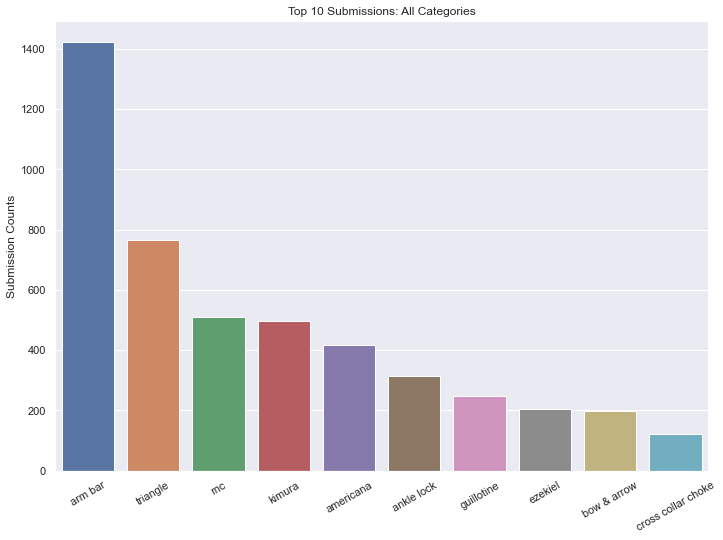

In [49]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.barplot(x=index, y=sub_counts)
ax.set_xticklabels(rotation=30, labels=index)
ax.set_title("Top 10 Submissions: All Categories")
ax.set_ylabel('Submission Counts')

plt.show()

<div class='alert alert-success'>
    Analysis of the top submissions returns expected results, the most reliable and highest percentage submissions are at the top. Arm bar, triangle, and kimura form the basis of jiu jitsu submissions which explains their high placement in the top submissions. Rear naked choke is also very popular, but more so in no gi. I expect to see the RNC to have a higher percentage of submission count in the no gi only category.
</div>

In [50]:
#no_gi sub counts and index
sub_counts_no_gi = jitz_no_gi['submission'].value_counts()[:10]
index_no_gi = jitz_no_gi['submission'].value_counts().index[:10]
#gi sub counts and index
sub_counts_gi = jitz_gi['submission'].value_counts()[:10]
index_gi = jitz_gi['submission'].value_counts().index[:10]

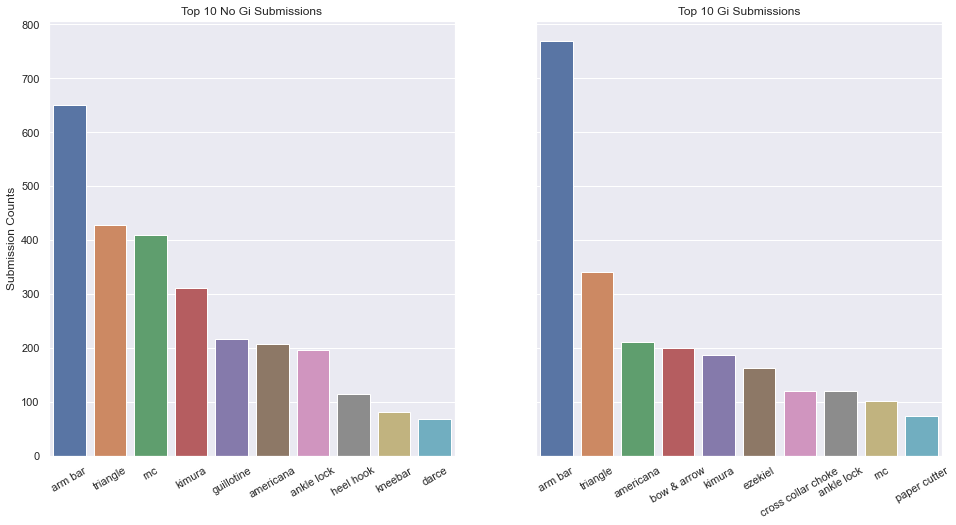

In [51]:
sns.set(rc={'figure.figsize':(16,8)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.barplot(x=index_no_gi, y=sub_counts_no_gi, ax=ax1)
sns.barplot(x=index_gi, y=sub_counts_gi, ax=ax2)

ax1.set_xticklabels(rotation=30, labels=index_no_gi)
ax2.set_xticklabels(rotation=30, labels=index_gi)

ax1.set_ylabel('Submission Counts')
ax2.set_ylabel('')

ax1.set_title('Top 10 No Gi Submissions')
ax2.set_title('Top 10 Gi Submissions')

plt.show()

In [52]:
arm_bar_no_gi = round(sub_counts_no_gi[0]/sub_counts_no_gi.sum()*100) 
arm_bar_gi = round(sub_counts_gi[0]/sub_counts_gi.sum()*100)
print("Percentage of submissions in no gi that are armbars: "+ str(arm_bar_no_gi) + "%.")
print("Percentage of submissions in gi that are armbars: "+ str(arm_bar_gi) + "%.")

Percentage of submissions in no gi that are armbars: 24%.
Percentage of submissions in gi that are armbars: 34%.


<div class='alert alert-success'>
    The arm bar comparision in the gi vs no gi is interesting. As shown above, the percentage of arm bar submissions no gi is 24% while the gi has a 10% higher arm bar dominance at 34%. This could be due to the friction of the gi, making the arm more secure in the finish, in no gi there is less friction and a higher chance for the opponent to escape. As stated above, the RNC does have a higher percentage in no gi, again due to less friction. The armbar and triangle are on top in both categories, proving their spot as the top 2 submissions.
</div>

### Comparing Beginner Subs to Advanced Subs
<p>Here I will group the beginners and the advanced practicioners into seperate groups to compare the submission counts between the two categories. Both categories will include gi and no gi, the beginner categories will include white/blue belts and novices, beginners, and intermediate. The advanced practicioner category will be purple, brown, black belts and the advanced category.</p>
<p>I suspect that the beginner category will have more americanas, as this is a very basic day one submission that is taught to beginners, this submission is easy to comprehend and set up making it more viable for new practicioners. The advanced category will likely have more leg locks and less americanas.</p>

In [53]:
jitz_beginner = pd.concat([jitz_white, jitz_blue, jitz_novice, jitz_beginner, jitz_intermediate])
jitz_beginner.head()

,total_seconds,gi/no_gi,belt/skill,division,submission
2,8.0,gi,white,masters,arm bar
10,11.0,gi,white,men,dq
12,11.0,gi,white,men,arm bar
18,13.0,gi,white,men,north south choke
26,15.0,gi,white,women,guillotine


In [54]:
jitz_advanced = pd.concat([jitz_purple, jitz_brown, jitz_black, jitz_advanced])
jitz_advanced.head()

,total_seconds,gi/no_gi,belt/skill,division,submission
33,16.0,gi,purple,men,triangle
34,16.0,gi,purple,masters,arm bar
48,19.0,gi,purple,men,ankle lock
59,20.0,gi,purple,men,cross collar choke
70,23.0,gi,purple,men,ankle lock


In [55]:
#beginner subs counts and index
sub_counts_beginner = jitz_beginner['submission'].value_counts()[:10]
index_beginner = jitz_beginner['submission'].value_counts().index[:10]
#advanced sub counts and index
sub_counts_advanced = jitz_advanced['submission'].value_counts()[:10]
index_advanced = jitz_advanced['submission'].value_counts().index[:10]

sub_counts_beginner_pct = []
sub_counts_advanced_pct = []

for count in sub_counts_beginner:
    total = sub_counts_beginner.sum()
    count = round(((count/total)*100))
    sub_counts_beginner_pct.append(count)
    
for count in sub_counts_advanced:
    total = sub_counts_advanced.sum()
    count = round(((count/total)*100))
    sub_counts_advanced_pct.append(count)
    
print(sub_counts_beginner_pct)
print(sub_counts_advanced_pct)

[30, 16, 11, 11, 10, 6, 5, 5, 4, 3]
[29, 15, 11, 9, 8, 8, 6, 5, 4, 4]


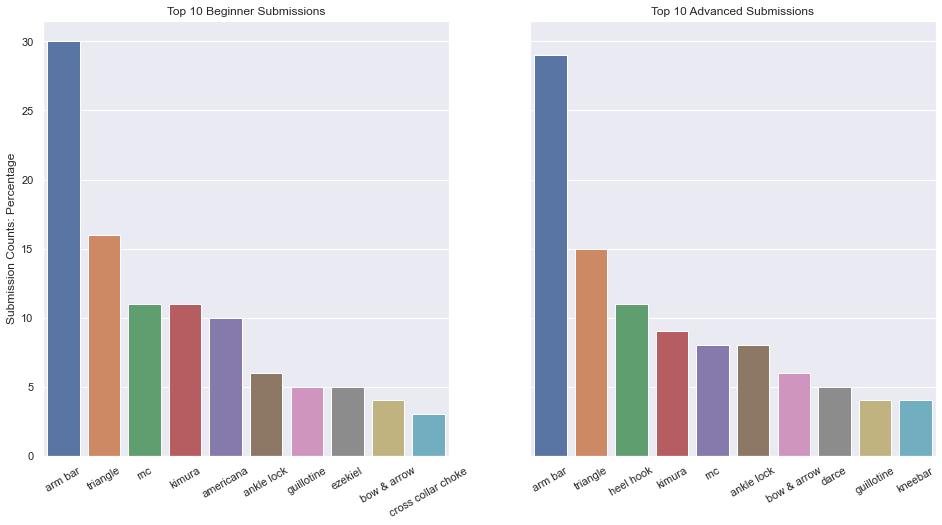

In [56]:
sns.set(rc={'figure.figsize':(16,8)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.barplot(x=index_beginner, y=sub_counts_beginner_pct, ax=ax1)
sns.barplot(x=index_advanced, y=sub_counts_advanced_pct, ax=ax2)

ax1.set_xticklabels(rotation=30, labels=index_beginner)
ax2.set_xticklabels(rotation=30, labels=index_advanced)

ax1.set_ylabel('Submission Counts: Percentage')
ax2.set_ylabel('')

ax1.set_title('Top 10 Beginner Submissions')
ax2.set_title('Top 10 Advanced Submissions')

plt.show()

In [57]:
kimura_pos = jitz_advanced[jitz_advanced['submission']=='americana'].value_counts().sum()
print("Percentage of Advanced Americana Submissions: " + str(round(kimura_pos/sub_counts_advanced.sum(), 2)*100) + "%.")

Percentage of Advanced Americana Submissions: 3.0%.


<div class='alert alert-success'>
Arm bar and triangle still on top, but after those two submissions it varies. RNC, kimura and americana are tied for third in beginner submissions. In the advanced category, americanas are sitting at 3% of submissions while the beginner category has 10% of submissions being americanas. Both predictions above turned out to be true, americanas are more prevalent in beginner submissions as well as foot locks being more prevalent in advanced submissions. I did not expect the ankle lock to be so high in the beginner category, even though it is a basic foot lock.
</div>

### Comparing Submissions Times

In [58]:
#Creating dataframe for submissions containing the total seconds, number of submissions hit, and the average sub time
submission_times = jitz[['submission', 'total_seconds']].groupby('submission').sum()
submission_times.head(20)
submission_times['counts'] = jitz['submission'].value_counts()
submission_times['avg_sub_time'] = submission_times['total_seconds']/submission_times['counts']
submission_times = submission_times.sort_values('counts', ascending=False)[:20]
submission_times = submission_times.sort_values('avg_sub_time')
submission_times

,total_seconds,counts,avg_sub_time
submission,,,
heel hook,33496.0,115,291.269565
cross choke,17267.0,50,345.340000
darce,46499.0,116,400.853448
guillotine,101839.0,248,410.641129
cross collar choke,51229.0,120,426.908333
triangle,348648.0,767,454.560626
bow & arrow,93642.0,199,470.562814
ankle lock,154283.0,315,489.787302
lapel choke,25288.0,51,495.843137


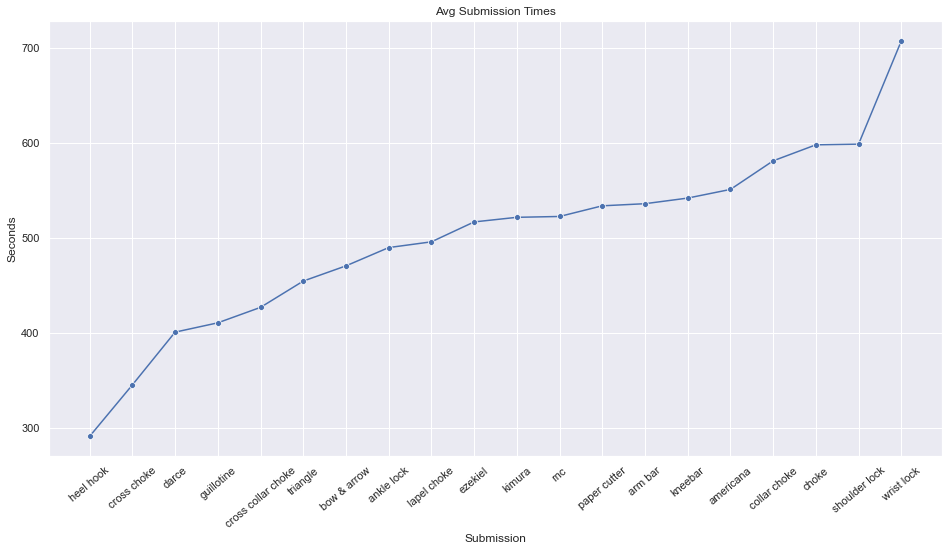

In [59]:
ax = sns.lineplot(data=submission_times['avg_sub_time'], marker='o')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(submission_times.index, rotation=40)
ax.set_title('Avg Submission Times')
ax.set_ylabel('Seconds')
ax.set_xlabel('Submission')

plt.show()

<div class="alert alert-success">
The two notable submission times that I see are heel hook and wrist lock, all the other ones seem relatively normally distributed. The heel hook was expected to be the fastest submission, it is notorious for having fast breaking mechanics and quick entries, which will lead to a lower average sub time. The high average submission time for wrist locks is very surprising though. A wrist lock is one of the few submissions that can be hit from anywhere and requires very little set up so you would think that these types of submissions could be hit quickly. The high average time for wrist locks could be explained by the fact that perhaps its thought of as a hail mary submission. This submission may be used more often as a last resort after previous submissions have failed, leading to the submission happening later in the match rather than earlier even though it has fast breaking mechanics and does not require as much of a set up.
</div>